In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import time

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, classification_report, roc_auc_score, roc_curve

import joblib

import warnings
warnings.filterwarnings('ignore')

### Defining User Functions

**Timer**

In [ ]:
start_time = None

def timer_start():
    global start_time
    start_time = time.time()

def timer_stop():
    global start_time
    if start_time is None:
        raise Exception('Timer was not started!')
    elapsed_time = time.time() - start_time
    hours, rem = divmod(elapsed_time, 3600)
    minutes, seconds = divmod(rem, 60)
    print(f'\nTime elapsed: {int(hours):0>2d}:{int(minutes):0>2d}:{seconds:05.2f}\n')
    start_time = None

**Visualization**

In [ ]:
def display_lineplot(dataframe):
    plt.figure(figsize = (12,12))
    for i, j in enumerate(dataframe.columns):
        plt.subplot(len(dataframe.columns), 1, i+1)
        plt.plot(dataframe[j])
        plt.xlabel("{}".format(j))
        plt.tight_layout()

    plt.subplots_adjust()

In [ ]:
def display_hist(dataframe):
    plt.figure(figsize = (12,12))
    for i, j in enumerate(dataframe.columns):
        plt.subplot(len(dataframe.columns), 1, i+1)
        plt.hist(dataframe[j])
        plt.xlabel("{}".format(j))
        plt.tight_layout()

    plt.subplots_adjust()

In [ ]:
def display_boxplot(dataframe):
    plt.figure(figsize = (12,5))
    for i, j in enumerate(dataframe.columns):
        plt.subplot(1, len(dataframe.columns), i+1)
        sns.boxplot(dataframe[j])
        plt.xlabel("{}".format(j))
        plt.tight_layout()

    plt.subplots_adjust()

## Data Analysis

In [ ]:
#path = 'C:\Users\vince\Documents\Methods of Research\Dataset\efan_ricecooker_ekettle.csv'
path = '/content/drive/MyDrive/CPE 020 (Methods of Research) - Final Paper (Group 3)/Appendices/Cleaned Datasets (CSV)/Electric Fan, Rice Cooker, Electric Kettle.csv'
df = pd.read_csv(path)

df.head()

,Voltage,Current,Power,Energy,Frequency,Power Factor,Electric Fan,Rice Cooker,Electric Kettle
0,243.4,0.2,45.6,0.34,59.8,0.95,1,0,0
1,243.3,0.2,45.7,0.34,59.8,0.95,1,0,0
2,243.4,0.2,45.7,0.34,59.8,0.95,1,0,0
3,243.3,0.2,45.7,0.34,59.8,0.95,1,0,0
4,243.4,0.2,45.7,0.34,59.9,0.95,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Voltage          394 non-null    float64
 1   Current          394 non-null    float64
 2   Power            394 non-null    float64
 3   Energy           394 non-null    float64
 4   Frequency        394 non-null    float64
 5   Power Factor     394 non-null    float64
 6   Electric Fan     394 non-null    int64  
 7   Rice Cooker      394 non-null    int64  
 8   Electric Kettle  394 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 27.8 KB


In [ ]:
df.columns

Index(['Voltage', 'Current', 'Power', 'Energy', 'Frequency', 'Power Factor',
       'Electric Fan', 'Rice Cooker', 'Electric Kettle'],
      dtype='object')

In [ ]:
df.rename(columns={'oltge':'Voltage (V)',
                   'Current':'Current (A)',
                   'Poer':'Power (W)',
                   'Energy':'Energy (kWh)',
                   'Poer Fctor':'Power Factor',
                   'Frequency':'Frequency (Hz)',
                   'Electric Fn':'Electric Fan'
                   },
          inplace=True)

In [ ]:
df.columns

Index(['Voltage', 'Current (A)', 'Power', 'Energy (kWh)', 'Frequency (Hz)',
       'Power Factor', 'Electric Fan', 'Rice Cooker', 'Electric Kettle'],
      dtype='object')

In [ ]:
df.isna().sum()

Voltage            0
Current (A)        0
Power              0
Energy (kWh)       0
Frequency (Hz)     0
Power Factor       0
Electric Fan       0
Rice Cooker        0
Electric Kettle    0
dtype: int64

In [ ]:
df_shuffled = shuffle(df, random_state=42)
df_shuffled.head()

,Voltage,Current (A),Power,Energy (kWh),Frequency (Hz),Power Factor,Electric Fan,Rice Cooker,Electric Kettle
78,239.3,3.43,821.2,0.180,60.0,1.00,0,1,0
275,235.7,10.15,2393.4,0.118,59.8,1.00,1,1,1
247,236.2,10.20,2409.1,0.097,59.8,1.00,1,1,1
55,244.1,0.20,45.9,0.341,59.9,0.94,1,0,0
389,237.1,10.00,2370.7,0.261,60.1,1.00,0,1,1


In [ ]:
feature_cols = df_shuffled.iloc[:,:-3]
target_cols = df_shuffled.iloc[:,-3:]

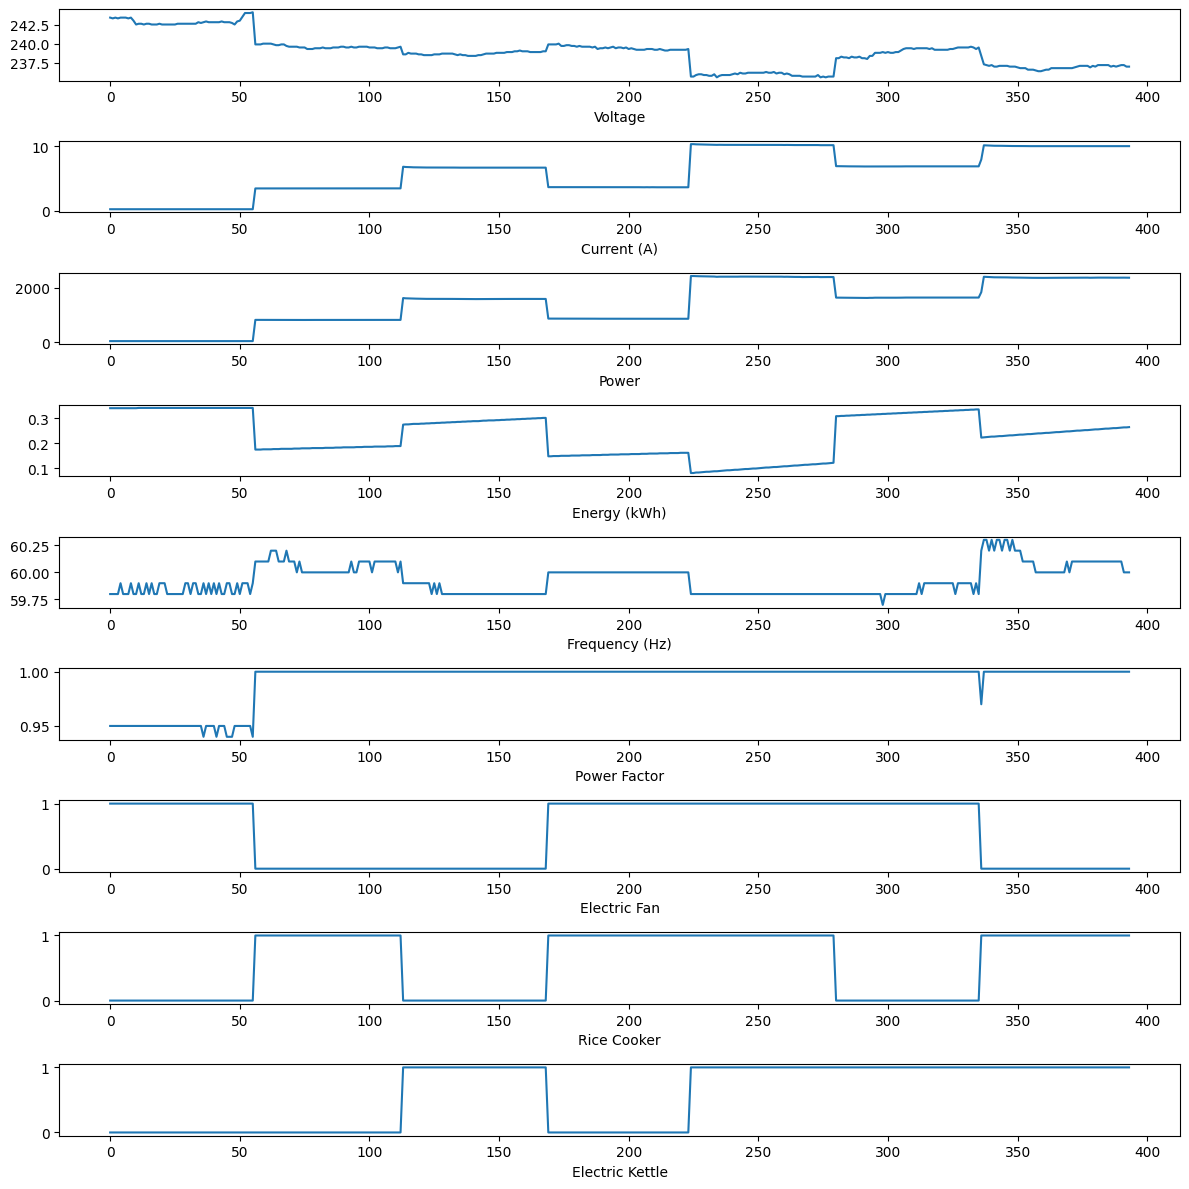

In [ ]:
display_lineplot(df)

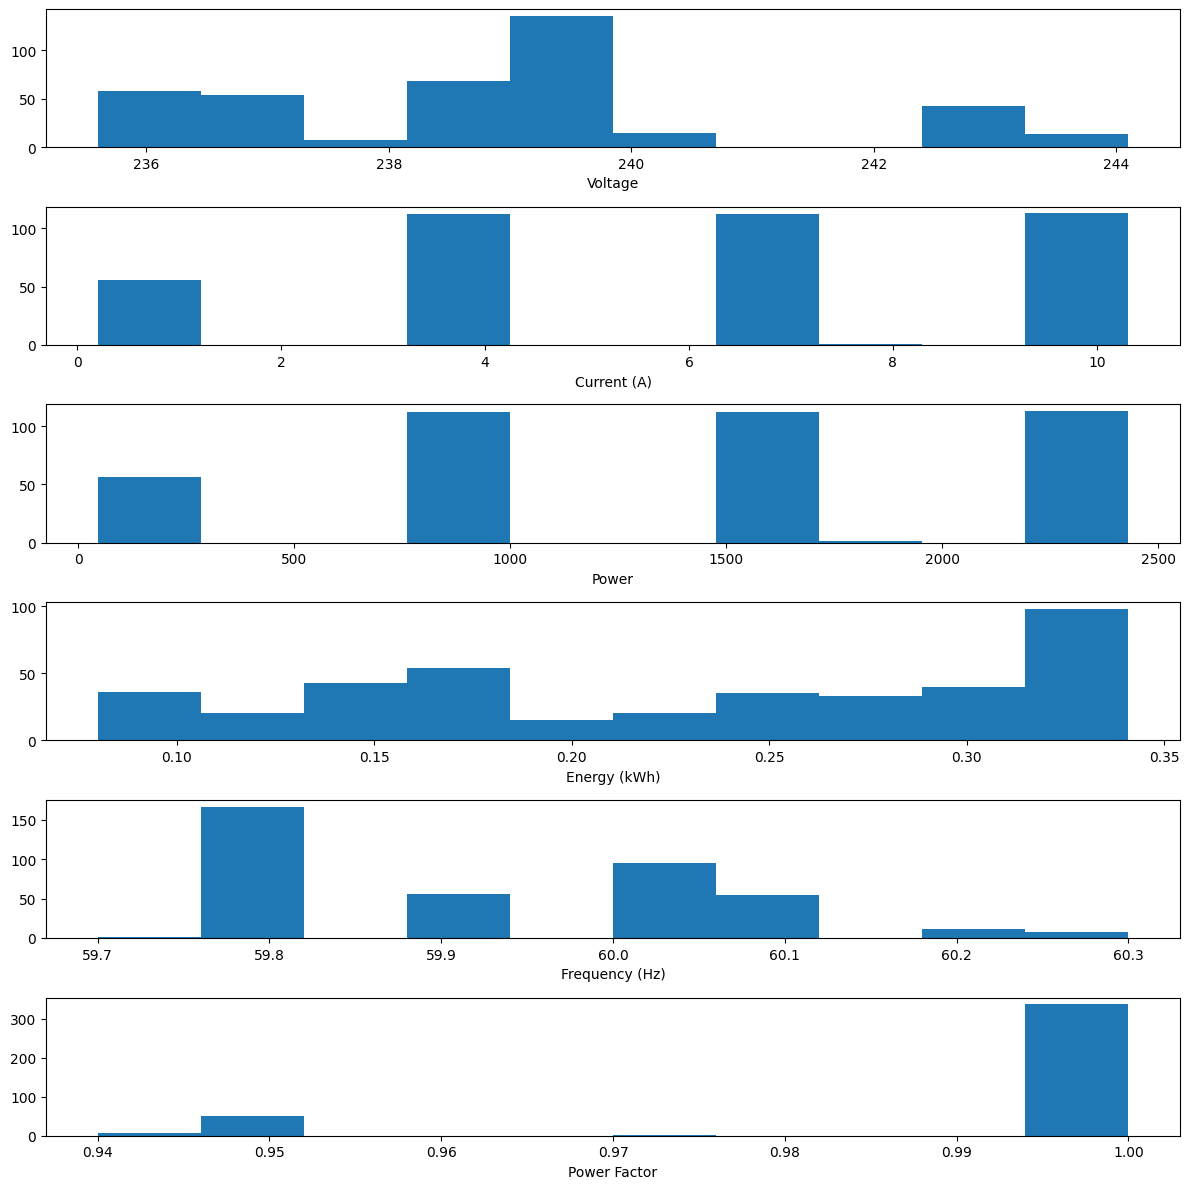

In [ ]:
display_hist(feature_cols)

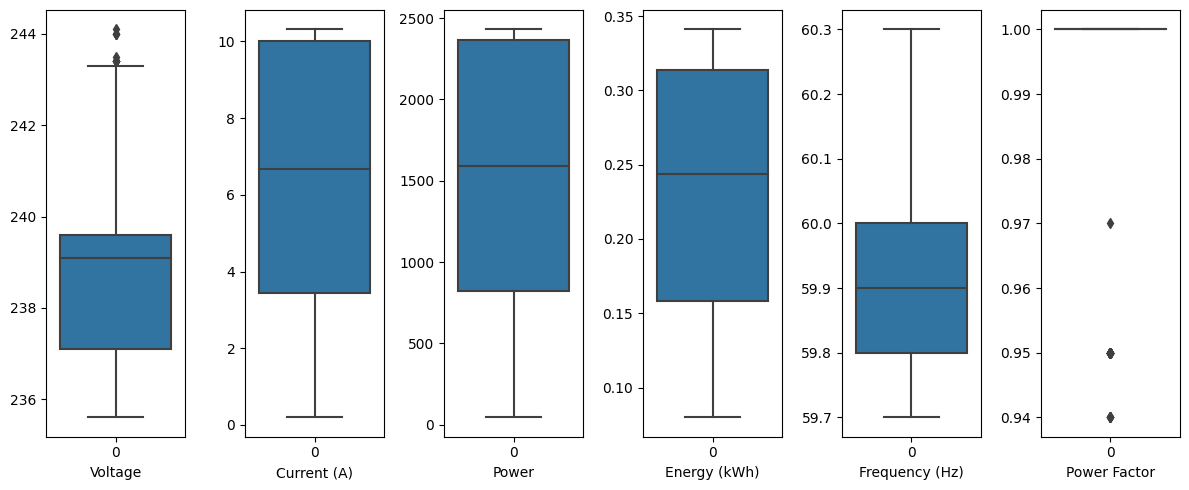

In [ ]:
display_boxplot(feature_cols)

## Data Preprocessing

In [ ]:
df_shuffled.columns

Index(['Voltage', 'Current (A)', 'Power', 'Energy (kWh)', 'Frequency (Hz)',
       'Power Factor', 'Electric Fan', 'Rice Cooker', 'Electric Kettle'],
      dtype='object')

In [ ]:
target_cols = ['Electric Fan', 'Rice Cooker', 'Electric Kettle']

In [ ]:
X = df_shuffled.drop(target_cols, axis=1)
y = df_shuffled[target_cols]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

In [ ]:
model = KNeighborsClassifier()

In [ ]:
timer_start()
model.fit(X_train, y_train)
timer_stop()


Time elapsed: 00:00:00.01



In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [ ]:
def print_test_accuracy():
    # Accuracy Score
    accu_score = accuracy_score(y_test, predictions)
    print(f'Accuracy Score: {(accu_score)*100:.3f}%\n')

def print_train_accuracy():
    # Accuracy Score
    predictions = model.predict(X_train)
    accu_score = accuracy_score(y_train, predictions)
    print(f'Accuracy Score: {(accu_score)*100:.3f}%\n')

def print_report():
    # Classification Report
    classification_reports = []
    for i, target_column in enumerate(df[target_cols].columns):
        report = classification_report(y_test[target_column], predictions[:, i])
        classification_reports.append((target_column, report))
    for device_name, report in classification_reports:
        print(f"Classification report for {device_name}:")
        print(report)
        print()

def display_confusion_mat():
    # Compute the multilabel confusion matrix
    confusion_matrices = multilabel_confusion_matrix(y_test, predictions)

    # Plot the multilabel confusion matrices

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=len(target_cols), figsize=(18, 6))

    # Iterate over each class
    for i, class_name in enumerate(target_cols):
        ax = axes[i]
        matrix = confusion_matrices[i]

        # Create the heatmap
        sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

        # Set the title and axis labels
        ax.set_title(f'Confusion Matrix for {class_name}')
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')

    plt.tight_layout()

def display_roc():
    roc_auc_scores = []
    for i, target_column in enumerate(df[target_cols].columns):
        roc_auc = roc_auc_score(y_test[target_column], predictions[:, i])
        roc_auc_scores.append((target_column, roc_auc))

    # Display the ROC AUC scores
    for target_column, roc_auc in roc_auc_scores:
        print(f"ROC AUC for {target_column}: {roc_auc}")

    # Plot the ROC curve for each target column
    plt.figure()
    for i, target_column in enumerate(df[target_cols].columns):
        fpr, tpr, _ = roc_curve(y_test[target_column], predictions[:, i])
        plt.plot(fpr, tpr, label=f"{target_column} (AUC = {roc_auc_scores[i][1]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
print_test_accuracy()

Accuracy Score: 95.798%



In [ ]:
print_train_accuracy()

Accuracy Score: 99.273%



In [ ]:
print_report()

Classification report for Electric Fan:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        53
           1       0.93      1.00      0.96        66

    accuracy                           0.96       119
   macro avg       0.96      0.95      0.96       119
weighted avg       0.96      0.96      0.96       119


Classification report for Rice Cooker:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.99      0.99        67

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119


Classification report for Electric Kettle:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        74

    accuracy                           1.00       119
   m

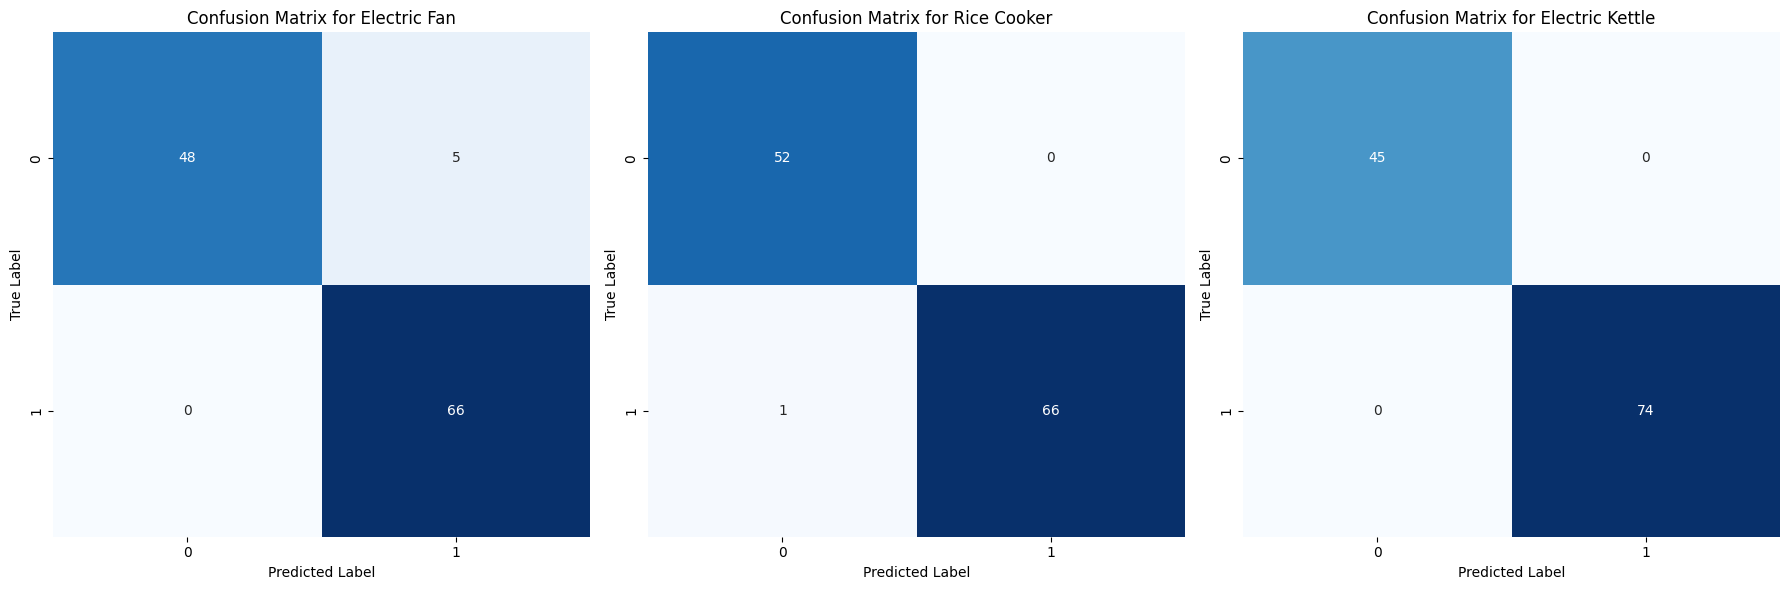

In [ ]:
display_confusion_mat()

ROC AUC for Electric Fan: 0.9528301886792453
ROC AUC for Rice Cooker: 0.9925373134328358
ROC AUC for Electric Kettle: 1.0


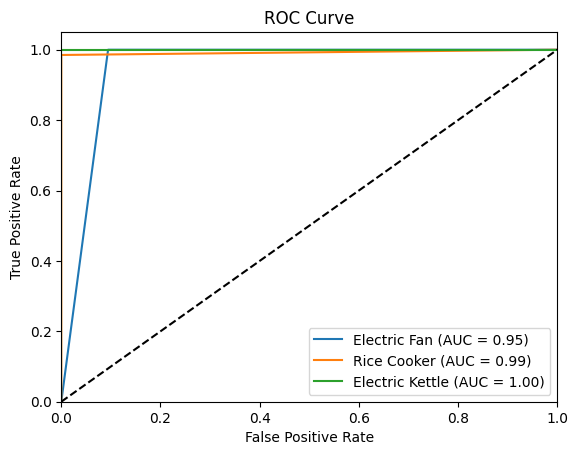

In [ ]:
display_roc()

In [ ]:
X_test.head(5)

,Voltage,Current (A),Power,Energy (kWh),Frequency (Hz),Power Factor
18,242.5,0.20,45.4,0.341,59.8,0.95
4,243.4,0.20,45.7,0.340,59.9,0.95
44,242.8,0.20,45.5,0.341,59.8,0.95
132,238.7,6.67,1591.9,0.284,59.8,1.00
71,239.6,3.43,821.3,0.178,60.1,1.00


In [ ]:
def predict_new(Voltage, Current, Power, Energy,
                Frequency, Power_Factor):
    test = [[Voltage, Current, Power, Energy, Frequency, Power_Factor]]
    display(model.predict(test))

In [ ]:
predict_new(239.4,6.86,1642.8,0.322,59.8,1.0)

array([[1, 0, 1]])

### **Save the model**

**Save as pickle file**

In [ ]:
joblib.dump(model, "knn_model.pkl")

['knn_model.pkl']

**Save as joblib file**

In [ ]:
joblib.dump(model, "knn_model.joblib")

['knn_model.joblib']